# Implementation of k-means clustering with HllSets

In [1]:
using LinearAlgebra

function kmeans(x, k; maxiters = 100, tol = 1e-5)

    N = length(x)
    n = length(x[1])
    distances = zeros(N)    # used to store the distance of each
                            # point to the nearest representative.
    reps = [zeros(n) for j=1:k] # used to store representatives.

    # 'assignment' is an array of N integers between 1 and k.
    # The initial assignment is chosen randomly.
    assignment = [ rand(1:k) for i in 1:N ]

    Jprevious = Inf # used in stopping condition
    for iter = 1:maxiters
        # Cluster j representative is average of points in cluster j.
        for j = 1:k
            group = [i for i=1:N if assignment[i] == j]
            reps[j] = sum(x[group]) / length(group);
        end;
        # For each x[i], find distance to the nearest representative
        # and its group index.
        for i = 1:N
            distances[i], assignment[i] = findmin([norm(x[i] - reps[j]) for j=1:k])
        end;

        println(assignment)

        # Compute clustering objective.
        J = norm(distances)^2 / N

        # Show progress and terminate if J stopped decreasing.
        println("Iteration ", iter, ": Jclust = ", J, ".")

        if iter > 1 && abs(J - Jprevious) < tol * Jprevious
            break
        end
        Jprevious = J
    end
    return assignment, reps
end



kmeans (generic function with 1 method)

In [2]:
println([ rand(1:3) for i in 1:100 ])

[2, 1, 3, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1, 2, 3, 1, 2, 2, 3, 3, 3, 3, 1, 3, 1, 2, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 2, 1, 1, 3, 2, 3, 1, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 2, 3, 3, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 2, 1, 3, 1]


[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


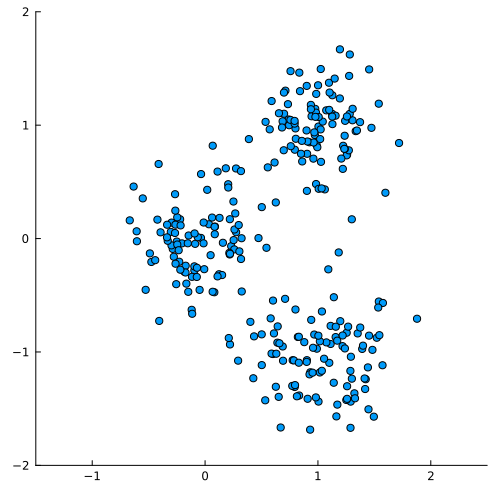

In [4]:
using Plots

X = vcat( [ 0.3*randn(2) for i = 1:100 ],
    [ [1,1] + 0.3*randn(2) for i = 1:100 ],
    [ [1,-1] + 0.3*randn(2) for i = 1:100 ] )
    

scatter([x[1] for x in X], [x[2] for x in X])

plot!(legend = false, grid = false, size = (500,500), xlims = (-1.5,2.5), ylims = (-2,2))


In [5]:
k = 3
assignment, reps = kmeans(X, k)

[1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1]
Iteration 1: Jclust = 1.0383791341856408.
[1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,

([1, 1, 1, 3, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [[-0.06668155326367224, -0.012775751017441687], [1.0158300968167528, -1.035480843057932], [1.0052345334730541, 0.9814687425482244]])

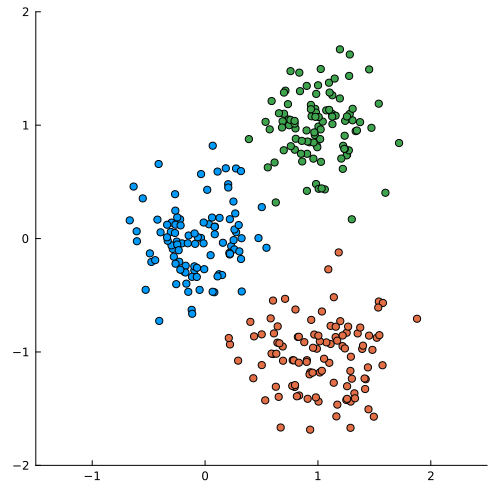

In [6]:
N = length(X)
grps = [[X[i] for i=1:N if assignment[i] == j] for j=1:k]
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]])
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]])
scatter!([c[1] for c in grps[3]], [c[2] for c in grps[3]])
plot!(legend = false, grid = false, size = (500,500), xlims = (-1.5,2.5), ylims = (-2,2))
